In [1]:
%pylab inline
import datetime as dt
from davitpy.models import raydarn
import davitpy
import pandas
import numpy as np
import os

Re = davitpy.utils.Re

Populating the interactive namespace from numpy and matplotlib


In [2]:
sTime = dt.datetime(2012, 9, 20, 4, 0)
eTime = dt.datetime(2012, 9, 20, 4, 0)
UTstart = sTime.hour + sTime.minute/60.
UTend = eTime.hour + eTime.minute/60.
radar = 'bks'
beam = 3
freq = 11
elev = (8, 40, 0.1)


In [3]:
# Run the ray tracing for the specified period, radar, beam and frequency
# Use 4 threads (MPI) and output everything to /tmp

try:
    os.remove('/tmp/iscat.0.dat')
except:
    pass
try:
    os.remove('/tmp/gscat.0.dat')
except:
    pass

rto = raydarn.RtRun(sTime, eTime, 
    rCode=radar, beam=beam, freq=freq, 
    outDir='/tmp', nprocs=4,elev=elev)

In [4]:
# Read rays into memory
rto.readRays()

In [5]:
#rto.rays.paths[dt.datetime(2012, 9, 20, 7, 0)]

In [6]:
#rto.elev

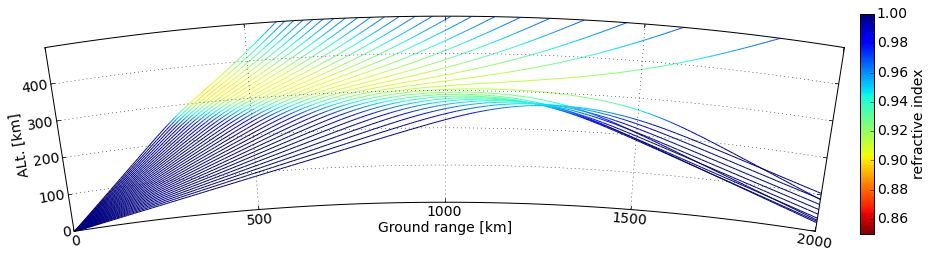

In [7]:
# Plot rays with refractive index color scale
# Plot 1 ray in 10 (1deg increment)
# Plot at start time
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.rays.plot(sTime, step=10, showrefract=True, nr_lim=[.85,1])

ax.grid()

In [8]:
# Read electron densities into memory
rto.readEdens()

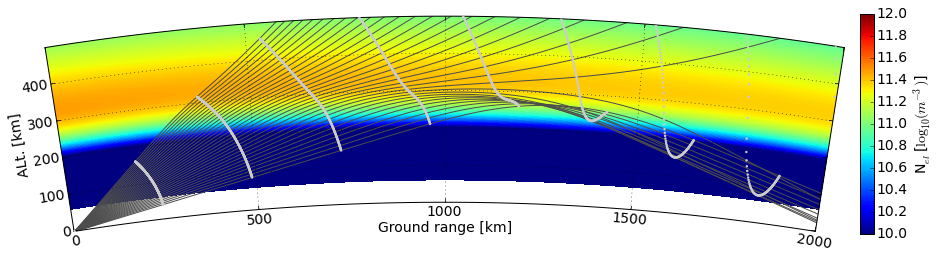

In [9]:
# Plot rays and electron densities together
# Plot at start time
# Plot range markers (every 250 km)
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cbax = rto.ionos.plot(sTime)
ax, aax, cbax = rto.rays.plot(sTime, 
    step=10, ax=ax, aax=aax)
rto.rays.showRange()

ax.grid()

In [10]:
# Read ionospheric and ground scatter into memory
rto.readScatter()

In [11]:
# rto.rays.writeToAscii('/home/davitpy/Desktop/rays.txt')

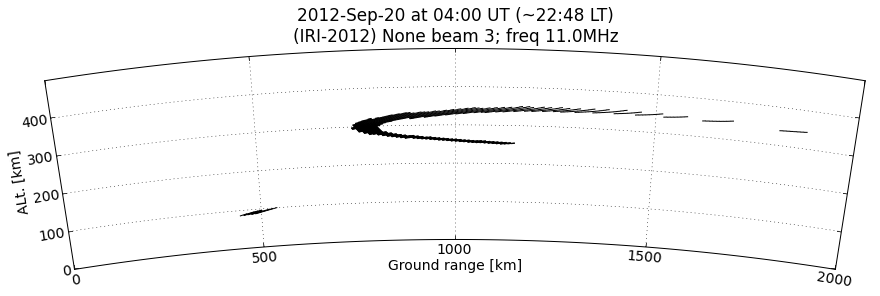

In [12]:
# Plot ionospheric and ground scatter together
# Plot at start time
# Plot relative strength of ionospheric scatter
figure(figsize=(15,5))
rcParams.update({'font.size': 14})

ax, aax, cax = rto.scatter.plot(sTime, title=True, weighted=False)

ax.grid()

In [13]:
#rto.scatter.isc

In [14]:
kt = rto.scatter.isc.keys()[0]
kb = rto.scatter.isc[kt].keys()[0]


In [15]:
dict_list = []
for kt in rto.scatter.isc.keys():
    for kb in rto.scatter.isc[kt].keys():
        elv_dict = rto.scatter.isc[kt][kb]
        for key,value in elv_dict.items():
            for ii in range(value['nstp']):
                tmp_dict = {'time':kt,'beam':kb,'elv_init':key,'radar':radar}
                for param,param_val in value.items():
                    if param == 'nstp': continue
                    tmp_dict[param] = param_val[ii]
                dict_list.append(tmp_dict)

In [16]:
df = pandas.DataFrame(dict_list)

In [17]:
#This code creates an additional dictionary list and DataFrame that identifies the elevation
#angles of all rays that are reflected by the ionosphere and backscattered by the ground.
#Knowledge of the highest elevation angle ground-backscattered ray greatly simplifies the 
#estimation of the refractive indices and great-circle distances to the scatter volumes.
#Currently the DataFrame does not include the great circle distance of the ground scatter.
#This will be an important addition and should be relatively easy to do, especially if the
# code is extended to estimate 1 1/2 hop scatter modes.

dict_list_gs = []
for kt in rto.scatter.gsc.keys():
    for kb in rto.scatter.gsc[kt].keys():
        elv_dict_gs = rto.scatter.gsc[kt][kb]
        for key,value in elv_dict_gs.items():
            tmp_dict_gs = {'time':kt, 'beam':kb, 'elv_init':key, 'radar':radar}
            dict_list_gs.append(tmp_dict_gs)
                             

In [18]:
dgs = pandas.DataFrame(dict_list_gs)

In [19]:
#The two-parameter analysis runs from the highest elevation-angle ray that detects scatter to the
#lowest. To accomplish this, both the df and dgs DataFrames need to be re-sorted and reindexed to run
#from high to low elevation angles. The re-sorted rays can be slassified into three groups.
#Group 1:Rays that refract sufficiently to be backscattered and then quickly penetrate the ionosphere.
#Group 2: Rays that backscatter below the peak of the F-region and again above the peak of the F-layer
#after which they penetrate the ionosphere. Group 3: Rays that backscatter below the peak of the F-layer
#and then are reflected by the ionosphere. Each group is processed by its associated phase of the
#analysis.

dgs.sort('elv_init', ascending=False, inplace=True)

In [20]:
dgs.reset_index(drop=True, inplace=True)

In [21]:
dgs.head(64)

,beam,elv_init,radar,time
0,3,17.2,bks,2012-09-20 04:00:00
1,3,17.1,bks,2012-09-20 04:00:00
2,3,17.0,bks,2012-09-20 04:00:00
3,3,16.9,bks,2012-09-20 04:00:00
4,3,16.8,bks,2012-09-20 04:00:00
5,3,16.7,bks,2012-09-20 04:00:00
6,3,16.6,bks,2012-09-20 04:00:00
7,3,16.5,bks,2012-09-20 04:00:00
8,3,16.4,bks,2012-09-20 04:00:00
9,3,16.3,bks,2012-09-20 04:00:00


In [22]:
del df['w']

In [23]:
#The peak electron density of the F-region ionosphere undergoes significant variation 
#in the course of a day. This variation requires a minimum of two operating 
#frequencies: one for daytime operation and one for nighttime operation. A third
#intermediate frequency might also be desirable for the dawn and dusk transitions. One
#can assure similar propagagion conditions, if the ground scatter footprint of a 
# signal at a specific initial elevation angle remains at  a similiar great circle
#distance. The equations below are used to identify the local time of the UT time that
#is being processed. The minimum ionospheric electron density occurs 1-2 hours before 
#local dawn, while the maximum density occurs a few hours afer local noon.

hysteresis = 1.
df['Loc_time'] = (df['time'][0].hour + df['time'][0].minute/60. + df['lon']/15. - hysteresis) % 24.

In [24]:
df.describe()

,beam,elv_init,gran,h,lat,lon,nr,r,rel,th,Loc_time
count,1078,1078.000000,1078.000000,1078,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
mean,3,16.591373,1032402.597403,10000,40.319221,-87.893937,0.929590,6662306.470315,9.255730,0.145957,21.140404
std,0,4.035657,243078.994677,0,0.733104,2.333859,0.023043,51049.984594,1.164247,0.033461,0.155591
min,3,8.000000,465000.000000,10000,38.643742,-98.352417,0.907491,6456922.500000,5.506001,0.069657,20.443172
25%,3,13.600000,895000.000000,10000,39.858254,-88.958378,0.911195,6639307.000000,8.561012,0.124880,21.069441
50%,3,18.200000,975000.000000,10000,40.154699,-87.360352,0.919126,6667362.750000,9.201091,0.138433,21.175977
75%,3,19.800000,1125000.000000,10000,40.658690,-86.426689,0.946109,6698259.875000,9.894671,0.161474,21.238221
max,3,21.400000,2115000.000000,10000,43.546585,-82.660767,0.999837,6722883.500000,13.044044,0.293406,21.489282


In [25]:
df['lgc_rt']=df['th'] * Re

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 14 columns):
beam        1078 non-null int64
elv_init    1078 non-null float64
gran        1078 non-null float64
h           1078 non-null float64
lat         1078 non-null float64
lon         1078 non-null float64
nr          1078 non-null float64
r           1078 non-null float64
radar       1078 non-null object
rel         1078 non-null float64
th          1078 non-null float64
time        1078 non-null datetime64[ns]
Loc_time    1078 non-null float64
lgc_rt      1078 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 126.3+ KB


In [27]:
df.head(18)

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,th,time,Loc_time,lgc_rt
0,3,8.5,485000,10000,38.712921,-82.874611,0.999813,6458155.0,bks,12.667921,0.072817,2012-09-20 04:00:00,21.475026,463.915099
1,3,8.5,495000,10000,38.746033,-82.976814,0.999604,6460246.5,bks,12.711969,0.074327,2012-09-20 04:00:00,21.468212,473.537788
2,3,8.5,505000,10000,38.779114,-83.078987,0.999433,6462367.0,bks,12.747213,0.075837,2012-09-20 04:00:00,21.461401,483.154592
3,3,8.5,515000,10000,38.812176,-83.181137,0.999313,6464452.0,bks,12.800088,0.077345,2012-09-20 04:00:00,21.454591,492.764607
4,3,8.5,1155000,10000,40.876793,-89.657394,0.964307,6623251.0,bks,9.453668,0.171539,2012-09-20 04:00:00,21.022840,1092.872366
5,3,8.5,1165000,10000,40.908253,-89.757690,0.962586,6623643.5,bks,8.931294,0.172975,2012-09-20 04:00:00,21.016154,1102.021470
6,3,8.5,1175000,10000,40.939686,-89.857979,0.960942,6624247.5,bks,8.398087,0.174410,2012-09-20 04:00:00,21.009468,1111.165828
7,3,8.5,1185000,10000,40.971100,-89.958260,0.959380,6625353.5,bks,7.862718,0.175845,2012-09-20 04:00:00,21.002783,1120.305439
8,3,9.5,1095000,10000,40.668808,-88.994057,0.963868,6625386.0,bks,10.180513,0.162028,2012-09-20 04:00:00,21.067063,1032.279437
9,3,9.5,1105000,10000,40.700188,-89.093765,0.962000,6626000.0,bks,9.648307,0.163460,2012-09-20 04:00:00,21.060416,1041.402719


In [28]:
df['height']=df['r']/1000.-Re

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 15 columns):
beam        1078 non-null int64
elv_init    1078 non-null float64
gran        1078 non-null float64
h           1078 non-null float64
lat         1078 non-null float64
lon         1078 non-null float64
nr          1078 non-null float64
r           1078 non-null float64
radar       1078 non-null object
rel         1078 non-null float64
th          1078 non-null float64
time        1078 non-null datetime64[ns]
Loc_time    1078 non-null float64
lgc_rt      1078 non-null float64
height      1078 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 134.8+ KB


In [30]:
df['h_2p'] = np.sqrt(Re**2 + (df['gran']*1e-3)**2 + 2*(df['gran']*1e-3)*Re*np.sin(df['elv_init']*np.pi/180.)) - Re
df['h_2p'].describe()

count    1078.000000
mean      372.054251
std       128.710715
min        88.935336
25%       292.570440
50%       338.820069
75%       427.126799
max       917.471376
Name: h_2p, dtype: float64

In [31]:
#The minimum height of the peak of the F-region electron density profile occurs a few hours
#after local noon and the minimum height occurs a few hours before dawn. EUV photons emitted
#by the sun is the principal process for creation of the ionosphere and 3-body recombination
#is the principal process for its decay. THe third body in the reaction is a neutral atom. Since
#the neutral density of the upper atmosphere decreases with altitude, the ionosphere after sunset
#decays from the bottom up. This equation is used in the 2-parameter analysis to mirror the
#in height of the ionosphere over a day. The changes in virtual height affect the Earth-centered
#included by the group path and the initial elevation angle and ultimately impact the great-circle
#distance of the scattering volume. The expression below optimmizes the diurnal variation of the
#virtual height and great-circle distance.

tmp = []
for index,row in df.iterrows():
    h_2p_max = 550. + 75*np.cos(row['Loc_time']*np.pi/24.)  #use 2000 for pure 2p-method, 550 for modified 2p-method
    if row['h_2p'] > h_2p_max:
        row['h_2p'] = h_2p_max
    tmp.append(row)    
df = pandas.DataFrame(tmp)
del tmp
df['h_2p'].describe()


count    1078.000000
mean      353.248331
std        90.600890
min        88.935336
25%       292.570440
50%       338.820069
75%       427.126799
max       482.983159
Name: h_2p, dtype: float64

In [32]:
df['th_2p']  = np.arcsin((df['gran']*1e-3)*np.cos(df['elv_init']*np.pi/180.) / (Re + df['h_2p']))
df['lgc_2p'] = df['th_2p'] * Re

In [33]:
df['nr_2p'] = np.zeros_like(df['th_2p'], dtype=np.float)
size = df['th_2p'].size
df['phase'] = np.zeros_like(df['beam'], dtype = np.int64)

In [34]:
df['lat_2p'], df['lon_2p'] = davitpy.utils.greatCircleMove(rto.site.geolat, rto.site.geolon, df['lgc_2p'], rto.azim[0]) 

In [35]:
df.sort(['elv_init', 'gran'], ascending=[False, True], inplace=True)
print size

1078


In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 22 columns):
beam        1078 non-null int64
elv_init    1078 non-null float64
gran        1078 non-null float64
h           1078 non-null float64
lat         1078 non-null float64
lon         1078 non-null float64
nr          1078 non-null float64
r           1078 non-null float64
radar       1078 non-null object
rel         1078 non-null float64
th          1078 non-null float64
time        1078 non-null datetime64[ns]
Loc_time    1078 non-null float64
lgc_rt      1078 non-null float64
height      1078 non-null float64
h_2p        1078 non-null float64
th_2p       1078 non-null float64
lgc_2p      1078 non-null float64
nr_2p       1078 non-null float64
phase       1078 non-null int64
lat_2p      1078 non-null float64
lon_2p      1078 non-null float64
dtypes: datetime64[ns](1), float64(18), int64(2), object(1)
memory usage: 193.7+ KB


In [38]:
see = ['lat','lon','lat_2p','lon_2p', 'lgc_2p']
df[see].tail(64)

,lat,lon,lat_2p,lon_2p,lgc_2p
1014,38.777836,-83.074875,38.677027,-83.193000,492.293026
1015,38.810867,-83.176918,38.705402,-83.297360,501.884233
1016,40.841419,-89.544373,40.264151,-89.861142,1091.078105
1017,40.872856,-89.644547,40.285263,-89.964681,1100.170303
1018,40.904278,-89.744713,40.306262,-90.068186,1109.253779
1019,40.935673,-89.844879,40.327149,-90.171654,1118.328508
1020,38.712337,-82.872658,38.620495,-82.986336,473.276832
1021,38.745422,-82.974808,38.649108,-83.090731,482.886510
1022,38.778488,-83.076927,38.677609,-83.195138,492.489530
1023,38.811535,-83.179031,38.705997,-83.299554,502.085856


In [39]:
df.head(64)


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p
0,3,21.4,895000,10000,39.814522,-86.287315,0.907491,6689722.5,bks,10.658216,...,21.247512,782.430429,318.7225,378.203930,0.123782,788.612047,0,0,39.510059,-86.454768
1,3,21.3,875000,10000,39.758202,-86.110756,0.908276,6685141.5,bks,10.634897,...,21.259283,766.143899,314.1415,367.341397,0.121281,772.680323,0,0,39.467601,-86.277453
2,3,21.3,885000,10000,39.787472,-86.202499,0.907912,6686920.0,bks,10.559120,...,21.253167,774.624089,315.9200,372.080175,0.122587,781.003248,0,0,39.489815,-86.370057
3,3,21.3,895000,10000,39.816738,-86.294243,0.907650,6688706.5,bks,10.512497,...,21.247050,783.100340,317.7065,376.830446,0.123892,789.314470,0,0,39.511925,-86.462590
4,3,21.2,865000,10000,39.730946,-86.025566,0.909041,6682488.0,bks,10.640727,...,21.264962,758.294743,311.4880,361.282714,0.120078,765.019154,0,0,39.447088,-86.192264
5,3,21.2,875000,10000,39.760250,-86.117386,0.908529,6684220.0,bks,10.521239,...,21.258841,766.786421,313.2200,365.995528,0.121388,773.362755,0,0,39.469425,-86.285044
6,3,21.2,885000,10000,39.789543,-86.209206,0.908126,6685943.5,bks,10.433837,...,21.252720,775.274064,314.9435,370.719880,0.122696,781.694676,0,0,39.491658,-86.377753
7,3,21.2,895000,10000,39.818825,-86.301025,0.907825,6687680.0,bks,10.375584,...,21.246598,783.757909,316.6800,375.455747,0.124002,790.014913,0,0,39.513785,-86.470391
8,3,21.2,915000,10000,39.877346,-86.484665,0.907502,6691236.5,bks,10.340637,...,21.234356,800.714018,320.2365,384.961926,0.126608,806.620323,0,0,39.557727,-86.655453
9,3,21.1,855000,10000,39.703743,-85.940361,0.910027,6679894.0,bks,10.707777,...,21.270643,750.424275,308.8940,355.263363,0.118871,757.326464,0,0,39.426429,-86.106776


In [40]:
# Determine the "phase" of the analysis.
#   Phase 1: Radar rays with same initial elevation angle are typically spaced approx. 10 km apart
#            but always less than 50 km apart
#   Phase 2: Radar rays with same initial elevation angle are spaced greater than 50 km apart
#   Phase 3: Radar rays are ground scatter rays.

phase_nr  = np.zeros([len(df)],dtype=np.int)
gran_diff = df.gran.diff()
first     = (np.where(gran_diff > 50000)[0]).min()
phase_nr[:first] = 1

# Make all entries of the elevation angle where the transition occurs a phase 2.
tmp_elv_init = df['elv_init'].loc[first]
tf = np.array( df['elv_init'] == tmp_elv_init)
phase_nr[tf] = 2

max_elv_init_gs = dgs['elv_init'][0]
tf = np.array( df['elv_init'] < max_elv_init_gs )

phase_nr[tf] = 3
phase_nr[phase_nr == 0] = 2
df['phase'] = phase_nr

In [41]:
def calc_nr(elv_init,th_2p,inclination_init):
    nr_2p = np.sin((90-elv_init-th_2p*180./np.pi)*np.pi/180.)/inclination_init
    return nr_2p

In [42]:
nr_2p = np.zeros([len(df)],dtype=np.float)
#nr_2p[0] = calc_nr(df['elv_init'][0], df['th_2p'][0])
for index, row in df.iterrows():
    inclination_init = np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    if index == 0:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'],inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] <  last_elv and row['phase'] == 1:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 1:
        nr_2p[index] = last_nr_2p #*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['elv_init'] <  last_elv and row['phase'] == 2:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)
        last_nr_2p = nr_2p[index]
    elif row['elv_init'] == last_elv and row['phase'] == 2:
        nr_2p[index] = last_nr_2p*inclination_init/np.sin((75.3 + 0.6*(Re*row['th_2p'])/112.)*np.pi/180.)
    elif row['phase'] == 3:
        nr_2p[index] = calc_nr(row['elv_init'], row['th_2p'], inclination_init)

    last_elv   = row['elv_init']
    #print index,row['elv_init'], nr_2p[index]
    
df['nr_2p'] = nr_2p

In [43]:
nr_offset = df['nr'].mean() - df['nr_2p'].mean()
print nr_offset
df['nr_2p'] = df['nr_2p'] + nr_offset

0.00205716323675


In [44]:
df.head(64)
#The table below displays the organization of the re-sorted and reindexed df DataFrame

,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,Loc_time,lgc_rt,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p
0,3,21.4,895000,10000,39.814522,-86.287315,0.907491,6689722.5,bks,10.658216,...,21.247512,782.430429,318.7225,378.203930,0.123782,788.612047,0.895836,1,39.510059,-86.454768
1,3,21.3,875000,10000,39.758202,-86.110756,0.908276,6685141.5,bks,10.634897,...,21.259283,766.143899,314.1415,367.341397,0.121281,772.680323,0.898135,1,39.467601,-86.277453
2,3,21.3,885000,10000,39.787472,-86.202499,0.907912,6686920.0,bks,10.559120,...,21.253167,774.624089,315.9200,372.080175,0.122587,781.003248,0.898135,1,39.489815,-86.370057
3,3,21.3,895000,10000,39.816738,-86.294243,0.907650,6688706.5,bks,10.512497,...,21.247050,783.100340,317.7065,376.830446,0.123892,789.314470,0.898135,1,39.511925,-86.462590
4,3,21.2,865000,10000,39.730946,-86.025566,0.909041,6682488.0,bks,10.640727,...,21.264962,758.294743,311.4880,361.282714,0.120078,765.019154,0.899671,1,39.447088,-86.192264
5,3,21.2,875000,10000,39.760250,-86.117386,0.908529,6684220.0,bks,10.521239,...,21.258841,766.786421,313.2200,365.995528,0.121388,773.362755,0.899671,1,39.469425,-86.285044
6,3,21.2,885000,10000,39.789543,-86.209206,0.908126,6685943.5,bks,10.433837,...,21.252720,775.274064,314.9435,370.719880,0.122696,781.694676,0.899671,1,39.491658,-86.377753
7,3,21.2,895000,10000,39.818825,-86.301025,0.907825,6687680.0,bks,10.375584,...,21.246598,783.757909,316.6800,375.455747,0.124002,790.014913,0.899671,1,39.513785,-86.470391
8,3,21.2,915000,10000,39.877346,-86.484665,0.907502,6691236.5,bks,10.340637,...,21.234356,800.714018,320.2365,384.961926,0.126608,806.620323,0.899671,1,39.557727,-86.655453
9,3,21.1,855000,10000,39.703743,-85.940361,0.910027,6679894.0,bks,10.707777,...,21.270643,750.424275,308.8940,355.263363,0.118871,757.326464,0.901202,1,39.426429,-86.106776


In [45]:
df['th_2p'].describe()

count    1078.000000
mean        0.147065
std         0.033664
min         0.071154
25%         0.126010
50%         0.139465
75%         0.162505
max         0.298890
Name: th_2p, dtype: float64

In [46]:
df['lgc_rt'].describe()

count    1078.000000
mean      929.892914
std       213.178429
min       443.785493
25%       795.610094
50%       881.958934
75%      1028.753540
max      1869.288169
Name: lgc_rt, dtype: float64

In [47]:
df['lgc_2p'].describe()

count    1078.000000
mean      936.954288
std       214.471538
min       453.323819
25%       802.810746
50%       888.529001
75%      1035.319592
max      1904.225415
Name: lgc_2p, dtype: float64

In [48]:
df['nr_2p'].describe()

count    1078.000000
mean        0.929590
std         0.022847
min         0.895836
25%         0.912525
50%         0.923311
75%         0.945374
max         1.000604
Name: nr_2p, dtype: float64

In [49]:
df['nr'].describe()

count    1078.000000
mean        0.929590
std         0.023043
min         0.907491
25%         0.911195
50%         0.919126
75%         0.946109
max         0.999837
Name: nr, dtype: float64

In [50]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR STANDARD METHOD

#df['hv_sm'] = np.zeros_like(df['gran'], dtype = np.float)
#hve = 115.
#hvf = 350.
#size=df['gran'].size
#print size
#for index in range(0, size-1):
    #gran_km = (df['gran'][index])/1000.
    #if gran_km < 600.:
        #df['hv_sm'][index] = hve
    #elif 800. > gran_km >= 600.:
        #df['hv_sm'][index] = (gran_km-600.)*(hvf-hve)/200. + hve
    #else:
        #df['hv_sm'][index] = hvf
#df['th_sm'] =np.arccos((Re**2.+(Re+ df['hv_sm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_sm'])))
#df['lgc_sm'] = df['th_sm'] * Re

In [51]:
#CODE TO DETERMINE GREAT-CIRCLE DISTANCES FOR CHISHAM METHOD

#df['hv_cm'] = np.zeros_like(df['gran'], dtype = np.float)
#size1 = df['gran'].size
#print size1
#for index1 in range(0, size1-1):
    #gran_km1 = (df['gran'][index1])/1000.
    #if gran_km1 < 790.:
        #df['hv_cm'][index1] = 108.974 + 0.0191721*gran_km1 + 6.6828*1e-5*gran_km1*gran_km1
    #else:
        #df['hv_cm'][index1] = 384.416 - 0.17864*gran_km1 + 1.81405*1e-4*gran_km1*gran_km1
        
#df['th_cm'] =np.arccos((Re**2.+(Re+ df['hv_cm'])**2-(df['gran']*1e-3)**2)/(2.*Re*(Re+ df['hv_cm'])))
#df['lgc_cm'] = df['th_cm'] * Re

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 22 columns):
beam        1078 non-null int64
elv_init    1078 non-null float64
gran        1078 non-null float64
h           1078 non-null float64
lat         1078 non-null float64
lon         1078 non-null float64
nr          1078 non-null float64
r           1078 non-null float64
radar       1078 non-null object
rel         1078 non-null float64
th          1078 non-null float64
time        1078 non-null datetime64[ns]
Loc_time    1078 non-null float64
lgc_rt      1078 non-null float64
height      1078 non-null float64
h_2p        1078 non-null float64
th_2p       1078 non-null float64
lgc_2p      1078 non-null float64
nr_2p       1078 non-null float64
phase       1078 non-null int64
lat_2p      1078 non-null float64
lon_2p      1078 non-null float64
dtypes: datetime64[ns](1), float64(18), int64(2), object(1)
memory usage: 193.7+ KB


In [53]:
#CODE FOR DETERMINING LGC AND NR DIFFERENCES BETWEEN RAY TRACING AND 2P-METHOD
#DIFFERENCES IN LGC BETWEEN RAY TRACING AND STANDARD/CHSHAM METHODS ARE COMMENTED OUT

df['lgc_diff_2p'] = df['lgc_rt'] - df['lgc_2p']
#df['lgc_diff_sm'] = df['lgc_rt'] - df['lgc_sm']
#df['lgc_diff_cm'] = df['lgc_rt'] - df['lgc_cm']
df['nr_diff_2p'] = df['nr'] - df['nr_2p'] 

In [54]:
df.head(700)
#THE COMPLETED DF DATAFRAME BELOW SHOWS IN THE 5 RIGHT-HAND COLUMNS: LGC AND NR FROM THE 2P-ANALYSIS,
#THE PHASE OF THE ANALYSIS, AND THE DIFFERENCE IN RAY-TRACING AND 2-P DETERMINATIONS OF LGC AND NR. 


,beam,elv_init,gran,h,lat,lon,nr,r,radar,rel,...,height,h_2p,th_2p,lgc_2p,nr_2p,phase,lat_2p,lon_2p,lgc_diff_2p,nr_diff_2p
0,3,21.4,895000,10000,39.814522,-86.287315,0.907491,6689722.5,bks,10.658216,...,318.7225,378.203930,0.123782,788.612047,0.895836,1,39.510059,-86.454768,-6.181619,0.011655
1,3,21.3,875000,10000,39.758202,-86.110756,0.908276,6685141.5,bks,10.634897,...,314.1415,367.341397,0.121281,772.680323,0.898135,1,39.467601,-86.277453,-6.536424,0.010140
2,3,21.3,885000,10000,39.787472,-86.202499,0.907912,6686920.0,bks,10.559120,...,315.9200,372.080175,0.122587,781.003248,0.898135,1,39.489815,-86.370057,-6.379159,0.009777
3,3,21.3,895000,10000,39.816738,-86.294243,0.907650,6688706.5,bks,10.512497,...,317.7065,376.830446,0.123892,789.314470,0.898135,1,39.511925,-86.462590,-6.214130,0.009515
4,3,21.2,865000,10000,39.730946,-86.025566,0.909041,6682488.0,bks,10.640727,...,311.4880,361.282714,0.120078,765.019154,0.899671,1,39.447088,-86.192264,-6.724411,0.009370
5,3,21.2,875000,10000,39.760250,-86.117386,0.908529,6684220.0,bks,10.521239,...,313.2200,365.995528,0.121388,773.362755,0.899671,1,39.469425,-86.285044,-6.576334,0.008858
6,3,21.2,885000,10000,39.789543,-86.209206,0.908126,6685943.5,bks,10.433837,...,314.9435,370.719880,0.122696,781.694676,0.899671,1,39.491658,-86.377753,-6.420612,0.008455
7,3,21.2,895000,10000,39.818825,-86.301025,0.907825,6687680.0,bks,10.375584,...,316.6800,375.455747,0.124002,790.014913,0.899671,1,39.513785,-86.470391,-6.257004,0.008155
8,3,21.2,915000,10000,39.877346,-86.484665,0.907502,6691236.5,bks,10.340637,...,320.2365,384.961926,0.126608,806.620323,0.899671,1,39.557727,-86.655453,-5.906305,0.007831
9,3,21.1,855000,10000,39.703743,-85.940361,0.910027,6679894.0,bks,10.707777,...,308.8940,355.263363,0.118871,757.326464,0.901202,1,39.426429,-86.106776,-6.902189,0.008825


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 24 columns):
beam           1078 non-null int64
elv_init       1078 non-null float64
gran           1078 non-null float64
h              1078 non-null float64
lat            1078 non-null float64
lon            1078 non-null float64
nr             1078 non-null float64
r              1078 non-null float64
radar          1078 non-null object
rel            1078 non-null float64
th             1078 non-null float64
time           1078 non-null datetime64[ns]
Loc_time       1078 non-null float64
lgc_rt         1078 non-null float64
height         1078 non-null float64
h_2p           1078 non-null float64
th_2p          1078 non-null float64
lgc_2p         1078 non-null float64
nr_2p          1078 non-null float64
phase          1078 non-null int64
lat_2p         1078 non-null float64
lon_2p         1078 non-null float64
lgc_diff_2p    1078 non-null float64
nr_diff_2p     1078 non-null float64
dty

(-20, 20)

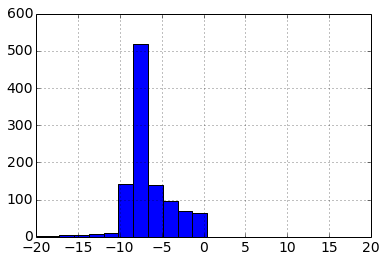

In [56]:
df['lgc_diff_2p'].hist(bins=20)
plt.xlim(-20, 20)


In [57]:
df['lgc_diff_2p'].describe()

count    1078.000000
mean       -7.061375
std         3.823738
min       -34.937246
25%        -8.312067
50%        -7.609164
75%        -5.522355
max         0.442182
Name: lgc_diff_2p, dtype: float64

In [58]:
#df['lgc_diff_sm'].hist(bins=20)
#plt.xlim(-200, 200)

In [59]:
df['h_2p'].describe()

count    1078.000000
mean      353.248331
std        90.600890
min        88.935336
25%       292.570440
50%       338.820069
75%       427.126799
max       482.983159
Name: h_2p, dtype: float64

In [60]:
#df['lgc_diff_cm'].hist(bins=20)
#plt.xlim(-200, 200)

In [61]:
#df['lgc_diff_cm'].describe()

(-0.2, 0.2)

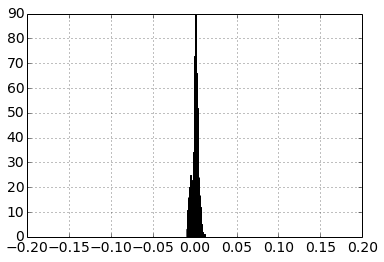

In [62]:
df['nr_diff_2p'].hist(bins=40)
plt.xlim(-0.2, 0.2)

In [63]:
df['nr_diff_2p'].describe()

count    1.078000e+03
mean     1.410951e-16
std      3.623570e-03
min     -9.350417e-03
25%     -1.804094e-03
50%      3.456995e-04
75%      2.272229e-03
max      1.165533e-02
Name: nr_diff_2p, dtype: float64

In [64]:
home_dir = os.getenv('HOME')
df.to_csv(os.path.join(home_dir,'Desktop/data.csv'))

In [65]:
df['nr_2p'].describe()

count    1078.000000
mean        0.929590
std         0.022847
min         0.895836
25%         0.912525
50%         0.923311
75%         0.945374
max         1.000604
Name: nr_2p, dtype: float64

In [66]:
df['phase'].describe()

count    1078.000000
mean        2.185529
std         0.738197
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: phase, dtype: float64